# Hypothesis Testing with Insurance Data 

For this assignment, we will be working with the US Health Insurance Dataset from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?



For each question, make sure to:

- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result


In [50]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics as stats2
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
## load the kiva_loans.csv. display info and head
df = pd.read_csv('insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
## Drop null values from related columns
df = df.dropna(subset=['smoker','charges'])

# Q1. Do smokers have higher insurance charges than non-smokers?


## 1. State the Hypothesis & Null Hypothesis

(Null Hypothesis): Smokers do not have higher insurance charges than non-smokers.

(Alternative Hypothesis): Smokers have higher insurance charges than non-smokers.

Determine the correct test to perform.

- Type of Data? Numeric
- How many groups/samples? 2 groups
- Therefore, which test is appropriate? 2 sample T test

In [4]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


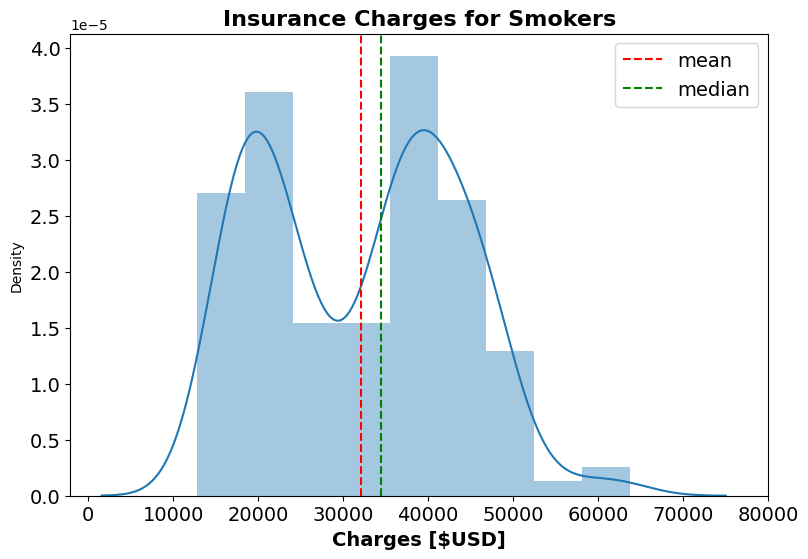

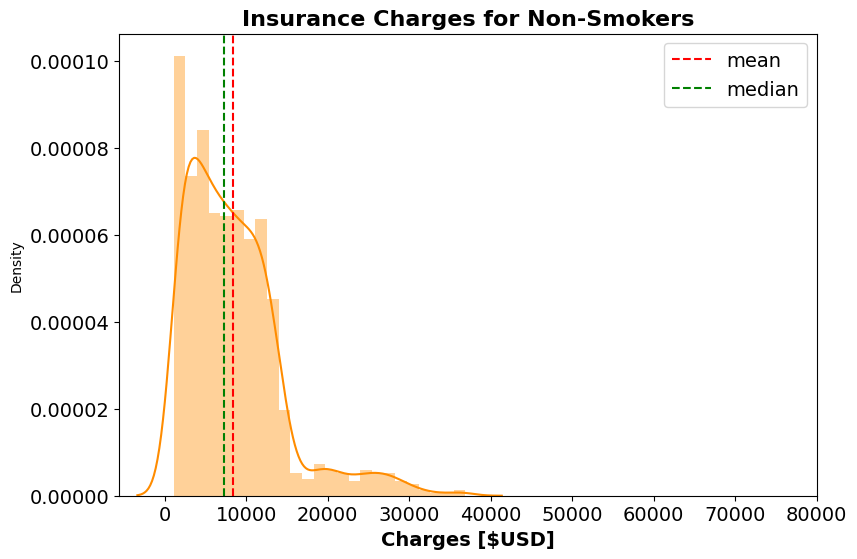

In [28]:
# get needed data
smoker = df.loc[df['smoker'] == 'yes', 'charges']     #insurance charges for smokers
nonsmoker = df.loc[df['smoker'] == 'no', 'charges']      #insurance charges for non-smokers

# reset index
smoker.reset_index(drop=True, inplace=True)
nonsmoker.reset_index(drop=True, inplace=True)

#histogram of charges for smokers
fig1 = plt.figure(figsize=[9,6]);
ax0 = sns.distplot(smoker, color='tab:blue');
ax0.axvline(np.mean(smoker),color='red',linestyle='--', label='mean')
ax0.axvline(np.median(smoker),color='green',linestyle='--', label='median')
#ax0.axvline(stats2.mode(smoker),color='black',linestyle='--', label='mode')
plt.xlabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('Insurance Charges for Smokers', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(fontsize=14);
ax0.set_xticks(np.arange(0,80001,10000));

#histogram of charges for non-smokers
fig2 = plt.figure(figsize=[9,6]);
ax1 = sns.distplot(nonsmoker, color='darkorange');
ax1.axvline(np.mean(nonsmoker),color='red',linestyle='--', label='mean')
ax1.axvline(np.median(nonsmoker),color='green',linestyle='--', label='median')
#ax1.axvline(stats2.mode(nonsmoker),color='black',linestyle='--', label='mode')
plt.xlabel('Charges [$USD]', fontsize='14', fontweight='bold');
plt.title('Insurance Charges for Non-Smokers', fontsize='16', fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.legend(fontsize=14);
ax1.set_xticks(np.arange(0,80001,10000));

## Testing Normality

In [31]:
#test for normality of sample data using both Shapiro-Wilks Test and Anderson-Darling Test
statistic1, pval1 = stats.shapiro(smoker)
statistic2, pval2 = stats.shapiro(nonsmoker)
astat1, crit1, sig1 = stats.anderson(smoker, dist='norm')
astat2, crit2, sig2 = stats.anderson(nonsmoker, dist='norm')
#print results
blah1 = astat1/crit1[4]
blah2 = astat2/crit2[4]
print("Shapiro-Wilks test")
print('Charges by smokers:      p-value: %.8f' % pval1)
print('Charges by non-smokers:  p-value: %.8f' % pval2)
print('\nAnderson-Darling Test')
print('Charges by smokers:      Anderson-Darling statistic is %.2f times the critical value for alpha = 0.01' % blah1)
print('Charges by non-smokers:  Anderson-Darling statistic is %.2f times the critical value for alpha = 0.01' % blah2)
print('\nNumber of samples:')
print('Charges by smokers:      n = {}' .format(len(smoker)))
print('Charges by non-smokers:  n = {}' .format(len(nonsmoker)))

Shapiro-Wilks test
Charges by smokers:      p-value: 0.00000000
Charges by non-smokers:  p-value: 0.00000000

Anderson-Darling Test
Charges by smokers:      Anderson-Darling statistic is 5.90 times the critical value for alpha = 0.01
Charges by non-smokers:  Anderson-Darling statistic is 25.49 times the critical value for alpha = 0.01

Number of samples:
Charges by smokers:      n = 274
Charges by non-smokers:  n = 1064


## Test for Equality of Variance

In [32]:
stat, pval = stats.levene(smoker, nonsmoker, center='mean')

if pval < 0.05:
    print('Reject Null Hypothesis: the variances are not equal for at least one pair.\np-value: %.8f' % pval)
else:
    print('Fail to Reject Null Hypothesis: the variances are equal across all samples.\np-value: %.8f' % pval)

Reject Null Hypothesis: the variances are not equal for at least one pair.
p-value: 0.00000000


## Final Hypothesis Test

In [33]:
## run final hypothess test
result = stats.ttest_ind(smoker,nonsmoker,equal_var=False)
result.pvalue <0.05

True

In [34]:
## make a plot or calcualte group means to know which group had more/less.
smoker.mean()

32050.23183153284

In [35]:
nonsmoker.mean()

8434.268297856204

- Final Conclusion:
p value>0.05 for the test so we reject the null hypothesis and support alternate hypothesis.

# Q3. Do different regions have different charges, on average?

## ## 1. State the Hypothesis & Null Hypothesis

(Null Hypothesis): Different regions do not have different charges, on average

(Alternative Hypothesis): Different regions have different charges, on average.

Determine the correct test to perform.

- Type of Data? Numeric
- How many groups/samples? 2 groups
- Therefore, which test is appropriate? 2 sample T test

In [56]:
## how many sectors?
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

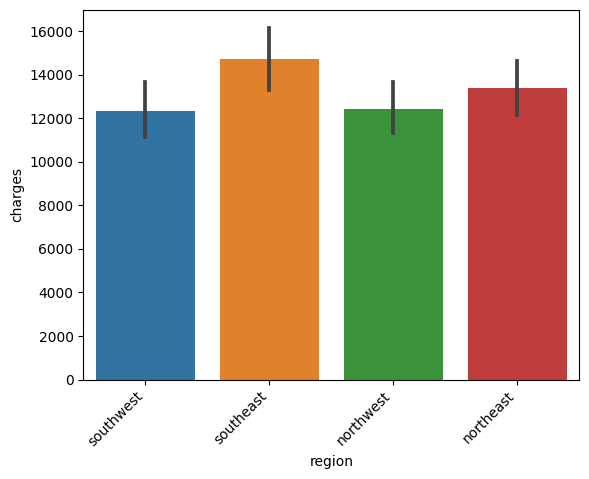

In [57]:
## barplot
ax = sns.barplot(data=df,x='region',y='charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [58]:
needed_cols = ['region','charges']
df[needed_cols]

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520
...,...,...
1333,northwest,10600.54830
1334,northeast,2205.98080
1335,southeast,1629.83350
1336,southwest,2007.94500


In [59]:
## Create a dictionary with each group as key and funded_amount as values
groups = {}

for region in df['region'].unique():
    temp = df.loc[df['region']==region,'charges']
    groups[region]=temp

In [60]:
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

## Testing Assumptions

In [61]:
temp = np.abs(stats.zscore(groups['southwest'])) > 3
temp.value_counts()

False    317
True       8
Name: charges, dtype: int64

In [62]:
## Loop through groups dict
for region, data in groups.items():
    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {region} group.")
    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[region] = data

There were 8 outliers in the southwest group.
There were 2 outliers in the southeast group.
There were 7 outliers in the northwest group.
There were 4 outliers in the northeast group.


## Test for Normality

In [63]:
# you can use stats.normaltest for each group separately or use the loop
stats.normaltest(groups['southwest']).pvalue <0.05

True

In [64]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for region, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([region,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

,group,n,pval,sig?
0,southwest,317,7.728611e-22,True
1,southeast,362,1.936990e-13,True
2,northwest,318,2.940543e-19,True
3,northeast,320,3.557877e-17,True


## Test for Equal Variances

In [65]:
## Use Levene's test for equal variance
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)


In [66]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


## Final Hypothesis Test

In [67]:
## Running Krukal Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)


False

- Final Conclusion:
p value>0.05 for the test so we reject the null hypothesis and support alternate hypothesis.

# Q2. Are men more likely to smoke than women?

# ## 1. State the Hypothesis & Null Hypothesis

(Null Hypothesis): Women are more likely to smoke than men.

(Alternative Hypothesis): Men more likely to smoke than women.

Determine the correct test to perform.

- Type of Data? Categorical
- How many groups/samples? 2 groups
- Therefore, which test is appropriate? Chi-square test

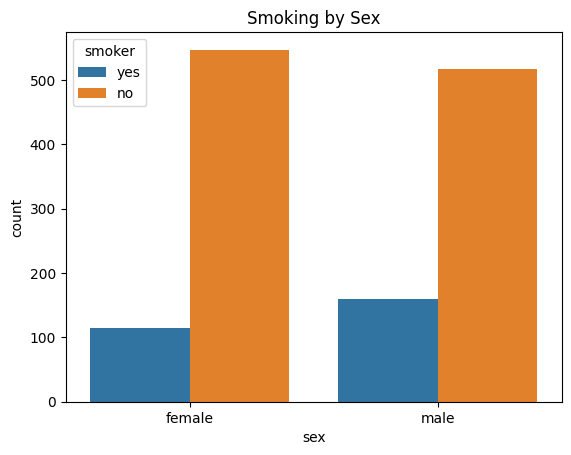

In [70]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Smoking by Sex");

In [71]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [72]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [73]:
print(p)
p<.05

0.006548143503580696


True

- The p-value is much less than 0.05 so we have a significant result.

- Final Conclusion: Since our p < .05, we reject the null hypothesis.

This means that we accept the alternate hypothesis and conclude that Men more likely to smoke than women.
